# Metadata

```
Name: Maureen O'Shea (mo2cr@virginia.edu)
Course: DS5001
Date: 06 May 2022

Title: Using TopicModel 

Description: Generate Topic Model for Corpus using TopicModel. Explore topics by play, genre and year.

Original Code Author: R.C. Alvarado, Module 08 Lab, Using TopicModel
```

# Set Up

In [1]:
data_home = "./data"
local_lib = "./lib"
data_prefix = 'folger'

In [2]:
BAG = ['play_code', 'act_num']

In [3]:
n_topics = 15

In [4]:
import pandas as pd
import numpy as np
import plotly_express as px
import sys; sys.path.append(local_lib)

In [5]:
from topicmodel import TopicModel

# Get Data

In [6]:
BOW = pd.read_csv(f'{data_home}/{data_prefix}-BOW.csv', low_memory=False).set_index(BAG+['term_str'])
VOCAB = pd.read_csv(f'{data_home}/{data_prefix}-VOCAB2.csv', low_memory=False).set_index('term_str')
LIB = pd.read_csv(f'{data_home}/{data_prefix}-LIB2.csv', low_memory=False).set_index('play_code')

In [7]:
LIB

,play_title,year,source_file_path,genre,play_id,play_len,n_acts,n_scenes,n_speeches,label
play_code,,,,,,,,,,
AWW,All's Well That Ends Well,1602,https://www.folgerdigitaltexts.org/AWW,comedy,0,11552,5,22,419,1602 (c): All's Well That Ends Well
Ant,Antony and Cleopatra,1606,https://www.folgerdigitaltexts.org/Ant,tragedy,1,12677,5,40,721,1606 (t): Antony and Cleopatra
AYL,As You Like It,1599,https://www.folgerdigitaltexts.org/AYL,comedy,2,8058,5,16,232,1599 (c): As You Like It
Err,The Comedy of Errors,1589,https://www.folgerdigitaltexts.org/Err,comedy,3,12097,5,11,495,1589 (c): The Comedy of Errors
Cor,Coriolanus,1607,https://www.folgerdigitaltexts.org/Cor,tragedy,4,20666,5,28,812,1607 (t): Coriolanus
Cym,Cymbeline,1609,https://www.folgerdigitaltexts.org/Cym,romance,5,22281,5,24,686,1609 (r): Cymbeline
Ham,Hamlet,1600,https://www.folgerdigitaltexts.org/Ham,tragedy,6,21048,5,20,674,1600 (t): Hamlet
1H4,"Henry IV, Part 1",1597,https://www.folgerdigitaltexts.org/1H4,history,7,16214,5,22,384,"1597 (h): Henry IV, Part 1"
2H4,"Henry IV, Part 2",1597,https://www.folgerdigitaltexts.org/2H4,history,8,8652,5,21,297,"1597 (h): Henry IV, Part 2"


In [8]:
BOW

n     tfidf
play_code act_num term_str                   
1H4       1       absent        1.0  0.029245
                  accursed      1.0  0.032818
                  acquaintance  1.0  0.031117
                  add           1.0  0.024651
                  adieu         1.0  0.021586
...                             ...       ...
Wiv       5       wives         2.0  0.150505
                  wood          1.0  0.083096
                  word          1.0  0.036410
                  would         2.0  0.056622
                  yet           1.0  0.028311

[123739 rows x 2 columns]

# Generate Topic Model

In [9]:
tm = TopicModel(BOW)
tm.n_topics = n_topics
tm.create_X()
tm.get_model()
tm.describe_topics()

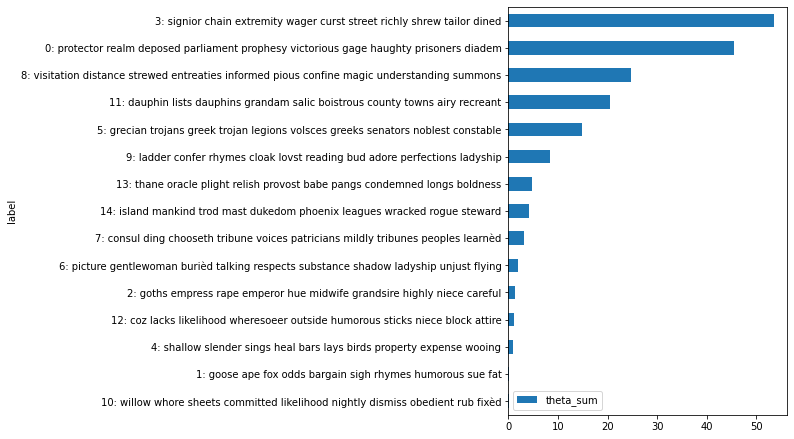

In [32]:
tm.plot_topics()

In [11]:
tm.THETA

topic_id                 0         1         2         3         4         5   \
play_code act_num                                                               
1H4       1        0.615498  0.000055  0.000055  0.000055  0.000055  0.132191   
          2        0.856112  0.000081  0.000081  0.140897  0.000081  0.000081   
          3        0.426047  0.000046  0.000046  0.000046  0.000046  0.041578   
          4        0.467826  0.000033  0.000033  0.000033  0.000033  0.124977   
          5        0.516300  0.000057  0.000057  0.108865  0.000057  0.055822   
...                     ...       ...       ...       ...       ...       ...   
WT        5        0.209894  0.000050  0.000050  0.310999  0.000050  0.000050   
Wiv       2        0.007407  0.007407  0.007407  0.007407  0.007407  0.007407   
          3        0.000330  0.000330  0.000330  0.000330  0.995380  0.000330   
          4        0.134464  0.000157  0.000157  0.815232  0.000157  0.000157   
          5        0.000360  0.000360  0.994955  0.000360  0.000360  0.000360   

topic_id                 6         7         8         9         10        11  \
play_code act_num                                                               
1H4       1        0.000055  0.000055  0.059408  0.000055  0.000055  0.192299   
          2        0.000081  0.000081  0.000081  0.000081  0.000081  0.002021   
          3        0.000046  0.000046  0.157026  0.000046  0.000046  0.374840   
          4        0.000033  0.000033  0.247627  0.000033  0.000033  0.159207   
          5        0.000057  0.000057  0.090131  0.000057  0.000057  0.228308   
...                     ...       ...       ...       ...       ...       ...   
WT        5        0.000050  0.000050  0.405415  0.000050  0.000050  0.000050   
Wiv       2        0.896296  0.007407  0.007407  0.007407  0.007407  0.007407   
          3        0.000330  0.000330  0.000330  0.000330  0.000330  0.000330   
          4        0.000157  0.000157  0.000157  0.000157  0.000157  0.048418   
          5        0.000360  0.000360  0.000360  0.000360  0.000360  0.000360   

topic_id                 12        13        14  
play_code act_num                                
1H4       1        0.000055  0.000055  0.000055  
          2        0.000081  0.000081  0.000081  
          3        0.000046  0.000046  0.000046  
          4        0.000033  0.000033  0.000033  
          5        0.000057  0.000057  0.000057  
...                     ...       ...       ...  
WT        5        0.000050  0.073138  0.000050  
Wiv       2        0.007407  0.007407  0.007407  
          3        0.000330  0.000330  0.000330  
          4        0.000157  0.000157  0.000157  
          5        0.000360  0.000360  0.000360  

[185 rows x 15 columns]

In [12]:
#LIB.dropna(subset=['doc_title'])

In [13]:
px.scatter(LIB, 'genre','year',  hover_name='label', width=600, height=400)

/Users/maureenoshea/opt/anaconda3/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



# Topic Groups

## Genre

In [14]:
LIB.columns

Index(['play_title', 'year', 'source_file_path', 'genre', 'play_id',
       'play_len', 'n_acts', 'n_scenes', 'n_speeches', 'label'],
      dtype='object')

In [15]:
group_col = 'genre'

In [16]:
RTM = tm.THETA.join(LIB[group_col]).groupby(group_col).mean(1).sort_index(ascending=False)

In [17]:
if group_col == 'genre':
    RTM.index = [i for i in RTM.index]

In [18]:
RTM.style.background_gradient(cmap='GnBu', axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tragedy,0.188890,0.000047,0.006806,0.280950,0.000047,0.199405,0.000047,0.027373,0.149237,0.025164,0.001189,0.072909,0.000047,0.026701,0.021187
romance,0.145802,0.000055,0.000055,0.302909,0.000055,0.036520,0.000055,0.000169,0.198619,0.008401,0.000055,0.041488,0.000055,0.134071,0.131690
history,0.587481,0.000052,0.000052,0.046783,0.000052,0.048473,0.002422,0.012319,0.144230,0.000052,0.000052,0.156768,0.000052,0.001162,0.000052
comedy,0.045861,0.002491,0.016819,0.495309,0.016827,0.012216,0.029660,0.016102,0.088366,0.113517,0.000243,0.129453,0.016879,0.008949,0.007310


The history genre is associated with words in topic 0 and the other 3 genres are associated with 

In [19]:
from pandas import option_context
with option_context('display.max_colwidth', 400):
    display(tm.TOPIC.top_terms_rel)

# tm.TOPIC.top_terms_rel

topic_id
0          protector realm deposed parliament prophesy victorious gage haughty prisoners diadem
1                                       goose ape fox odds bargain sigh rhymes humorous sue fat
2                         goths empress rape emperor hue midwife grandsire highly niece careful
3                          signior chain extremity wager curst street richly shrew tailor dined
4                            shallow slender sings heal bars lays birds property expense wooing
5                grecian trojans greek trojan legions volsces greeks senators noblest constable
6           picture gentlewoman burièd talking respects substance shadow ladyship unjust flying
7                consul ding chooseth tribune voices patricians mildly tribunes peoples learnèd
8     visitation distance strewed entreaties informed pious confine magic understanding summons
9                       ladder confer rhymes cloak lovst reading bud adore perfections ladyship
10                  willow whor

In [20]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(tm.TOPIC.top_terms)
    
#tm.TOPIC.top_terms

topic_id
0                          thy lord king hath let come us good well death
1                     odds goose sigh fox ape fat slow sue bargain rhymes
2          emperor empress goths revenge roman boy rape see justice sweet
3                             come thy well sir good ill love go know let
4           master love come good shallow sir seek fathers daughter birds
5                            us th let come great like good upon well thy
6                      love thy madam would sir well know lady good think
7                     th would people pray must speak one upon sir voices
8                             lord good th would sir may know tis well us
9                         love thy lord would good may hath much sir upon
10    whore alas weep committed willow heaven obedient tears sheets naked
11                      thy love doth fair hath death upon night day eyes
12               go well sir father daughter upon fathers duke would fare
13                        th 

In [21]:
RTM.idxmax(1)

tragedy    3
romance    3
history    0
comedy     3
dtype: int64

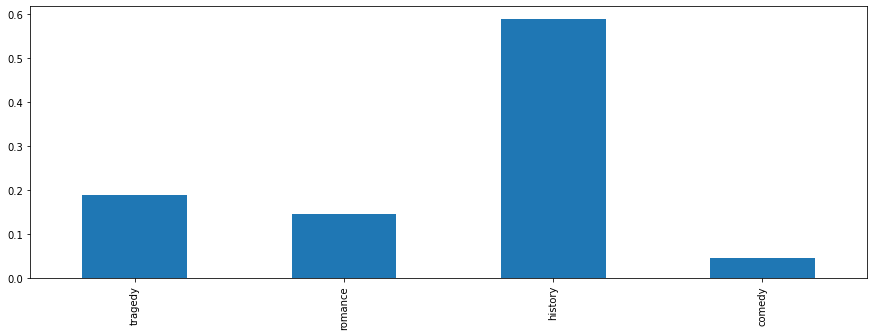

In [22]:
RTM[0].plot.bar(figsize=(15,5));

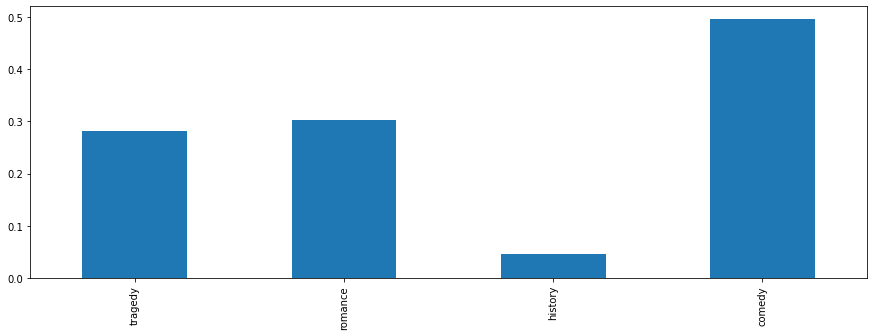

In [23]:
RTM[3].plot.bar(figsize=(15,5));

### Year

In [24]:
group_col ='year'

In [25]:
RTM = tm.THETA.join(LIB[group_col]).groupby(group_col).mean(1).sort_index(ascending=False)

In [26]:
if group_col == 'year':
    RTM.index = [i for i in RTM.index]

In [27]:
RTM.style.background_gradient(cmap='GnBu', axis=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1612,0.064742,0.000038,0.000038,0.026175,0.000038,0.000038,0.000038,0.122707,0.780299,0.000038,0.000038,0.000038,0.000038,0.005694,0.000038
1611,0.084318,0.000074,0.000074,0.183290,0.000074,0.021760,0.000074,0.000074,0.173899,0.000074,0.000074,0.046443,0.000074,0.022978,0.466721
1610,0.066011,0.000049,0.000049,0.266633,0.000049,0.000049,0.000049,0.000049,0.221547,0.000049,0.000049,0.011131,0.000049,0.434192,0.000049
1609,0.179095,0.000039,0.000039,0.468449,0.000039,0.110353,0.000039,0.000496,0.201390,0.000039,0.000039,0.000039,0.000039,0.039867,0.000039
1608,0.253783,0.000059,0.000059,0.293263,0.000059,0.013918,0.000059,0.000059,0.197641,0.033444,0.000059,0.108340,0.000059,0.039248,0.059951
1607,0.091753,0.000053,0.000053,0.186567,0.000053,0.260482,0.000053,0.134122,0.110606,0.104175,0.000053,0.000053,0.000053,0.003742,0.108179
1606,0.160965,0.000068,0.003255,0.380104,0.000068,0.216023,0.000068,0.000068,0.218436,0.000068,0.000068,0.000068,0.000068,0.020609,0.000068
1605,0.240104,0.000049,0.000049,0.252012,0.000049,0.067096,0.000049,0.000049,0.304887,0.011330,0.000049,0.007766,0.000049,0.111281,0.005182
1604,0.069315,0.000056,0.000056,0.558508,0.000056,0.059703,0.000056,0.000056,0.246290,0.000056,0.006335,0.011062,0.000056,0.045331,0.003064
1602,0.052527,0.000080,0.000080,0.385746,0.000080,0.013948,0.000080,0.000080,0.350690,0.158062,0.000080,0.037150,0.000080,0.001239,0.000080


In [28]:
RTM.idxmax(1)

1612     8
1611    14
1610    13
1609     3
1608     3
1607     5
1606     3
1605     8
1604     3
1602     3
1601     5
1600     3
1599     3
1598     3
1597     0
1596     3
1595     0
1594     3
1593     3
1592     0
1591     0
1590     0
1589     3
dtype: int64

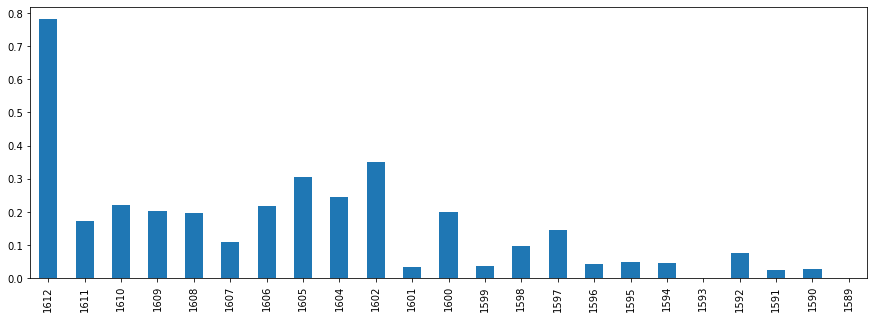

In [29]:
RTM[8].plot.bar(figsize=(15,5));

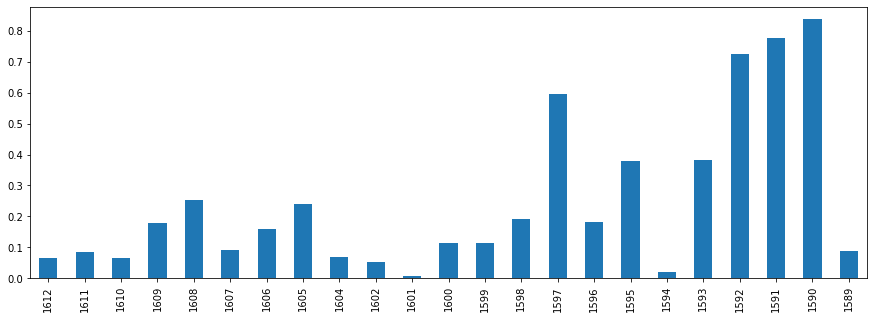

In [30]:
RTM[0].plot.bar(figsize=(15,5));

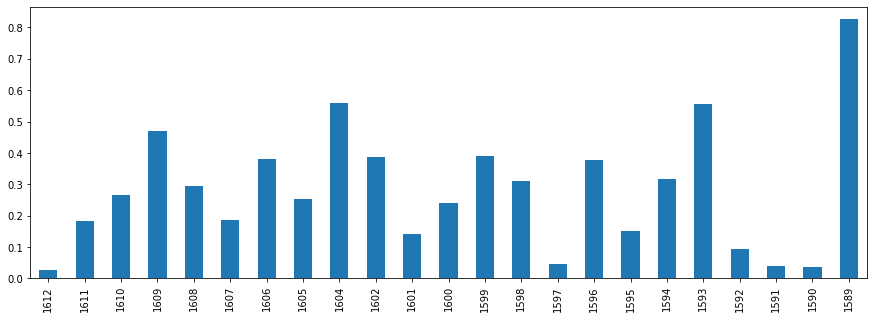

In [31]:
RTM[3].plot.bar(figsize=(15,5));